## Gráficos del informe final

Links de interés a la hora de hacer gráficos:  
Letras griegas y Latex  
https://matplotlib.org/stable/tutorials/text/mathtext.html  
Colores  
https://matplotlib.org/stable/gallery/color/named_colors.html  
Legend's location  
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-outside-the-plot  


In [1]:
#Importo librerías
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import matplotlib
import math
pi = math.pi


In [2]:
#Fuente
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 14}
matplotlib.rc('font', **font)
tau = 2.3452

### Testeo
Hago un test graficando todos los resultados de una ejecución

In [3]:
#Importo datos
datos_velocidad = genfromtxt('datos/velocentral.txt', delimiter=' ')
datos_evolucion = genfromtxt('datos/evolucion.txt', delimiter=' ')

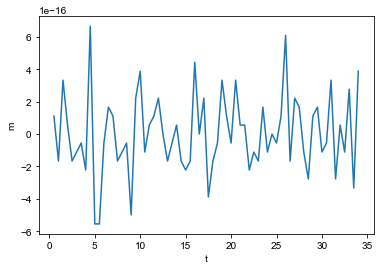

In [4]:
#Conservación de masa

plt.plot(datos_evolucion[:,0], datos_evolucion[:,1], label='Masa(t)')
#Parámetros del gráfico:
# plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('m');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))



# #Guardo el gráfico
# plt.savefig('sol_aprox.pdf', format='pdf',bbox_inches = "tight")


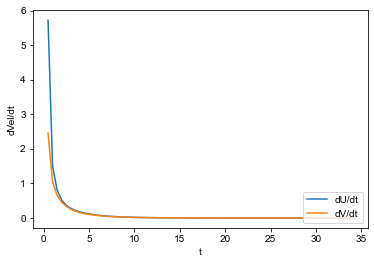

In [5]:
#dUdt y dVdt

#Grafico

#Conservación de masa
plt.plot(datos_evolucion[:,0], datos_evolucion[:,2], label='dU/dt')
plt.plot(datos_evolucion[:,0], datos_evolucion[:,3], label='dV/dt')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('dVel/dt');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

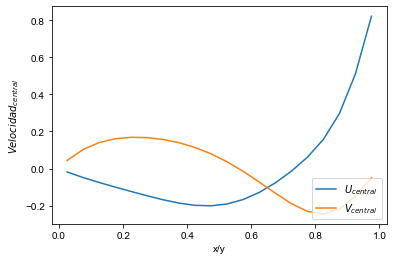

In [6]:
#Velocidad central

#Grafico


plt.plot(datos_velocidad[:,0], datos_velocidad[:,1], label='$U_{central}$')
plt.plot(datos_velocidad[:,0], datos_velocidad[:,2], label='$V_{central}$')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('x/y')
plt.ylabel('$Velocidad_{central}$');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

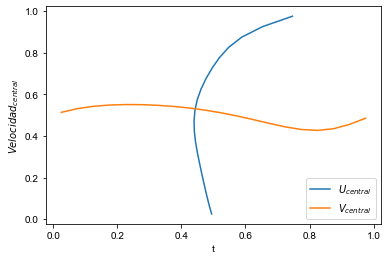

In [7]:
#Velocidad central adimensionalizada y graficada sobre el recinto

#Grafico

amplitud = 0.3
plt.plot(amplitud*datos_velocidad[:,1] + 0.5, datos_velocidad[:,0], label='$U_{central}$')
plt.plot(datos_velocidad[:,0], amplitud*datos_velocidad[:,2] + 0.5, label='$V_{central}$')
#Parámetros del gráfico:
plt.legend(loc='lower right')
plt.xlabel('t')
plt.ylabel('$Velocidad_{central}$');
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))

### Inciso a

Grafico u y v en el centro en función de deltat para ver si cambia con deltat

In [8]:
#Importo datos
datos = genfromtxt('datos/a_velcentral.csv', delimiter=',')


C:\Users\lupam\AppData\Local\Temp\ipykernel_4164\2928608263.py:2: UserWarning: genfromtxt: Empty input file: "datos/a_velcentral.csv"
  datos = genfromtxt('datos/a_velcentral.csv', delimiter=',')


In [9]:
dt_array = datos[:,0]
Ucentro_array = datos[:,1]
Vcentro_array = datos[:,2]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

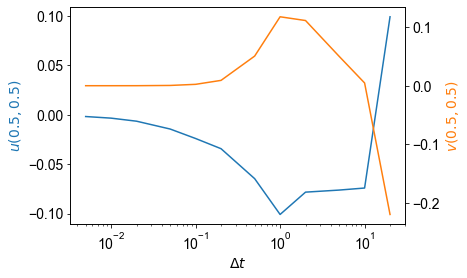

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()



ax1.plot(dt_array, Ucentro_array, color = "tab:blue")
ax2.plot(dt_array, Vcentro_array, color = "tab:orange")

ax1.set_xlabel('X data')
ax1.set_ylabel('Y1 data', color='g')
ax2.set_ylabel('Y2 data', color='b')


# plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
ax1.set_xlabel('$\Delta t$')
ax1.set_ylabel('$u(0.5,0.5)$', color = "tab:blue")
ax2.set_ylabel('$v(0.5,0.5)$', color = "tab:orange")

# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('a_vel_vs_dt.pdf', format='pdf',bbox_inches = "tight")

### Inciso b
Grafico para DC2 los errores respecto a los resultados de Guia

In [ ]:
#Resultados de Guia: (copiados directamente del paper)
#orden: Re: [100, 1000, 5000]
guia_ucentral = np.array([-0.20581, -0.06080, -0.03039])
guia_vcentral = np.array([0.05454, 0.02526, 0.00945])

In [ ]:
#Cargo datos
datos_u = genfromtxt('datos/b_ucentral.csv', delimiter=',')
datos_v = genfromtxt('datos/b_vcentral.csv', delimiter=',')

In [ ]:
# testeo = np.array([[1,2,3],[1,2,3]])
# print(testeo.shape[0])

2


In [ ]:
def errores_advectivo(datos_u, datos_v, guia_ucentral,guia_vcentral):
    #Calcula los errores considerando que se cambió el esquema del término advectivo
    #datos_u: datos de la velocidad u central
    #datos_v: datos de la velocidad v central
    #guia_ucentral: datos de la velocidad u central de Guia
    #guia_vcentral: datos de la velocidad v central de Guia

    #Creo la matriz de errores que calcula cuadráticamente los errores para cada valor de n1 y Re
    errores = np.zeros(datos_u.shape)
    for i in range(datos_u.shape[0]):
        for j in range(datos_u.shape[1]):
            modulo = guia_ucentral[j]**2 + guia_vcentral[j]**2
            errores[i,j] = np.sqrt((datos_u[i,j] - guia_ucentral[j])**2 + (datos_v[i,j] - guia_vcentral[j])**2)/modulo
            
    return errores

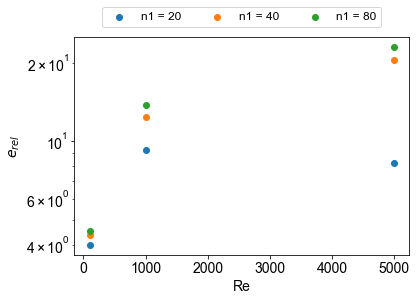

In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u, datos_v, guia_ucentral,guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e_{rel}$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('b_error_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

### Inciso c
Es hacer lo mismo que el b pero con otros datos (que se produjeron usando como término advectivo UP1 y QUICK)

In [ ]:
#Cargo datos
datos_u_UP1 = genfromtxt('datos/c_ucentral_U.csv', delimiter=',')
datos_v_UP1 = genfromtxt('datos/c_vcentral_U.csv', delimiter=',')
datos_u_QUICK = genfromtxt('datos/c_ucentral_Q.csv', delimiter=',')
datos_v_QUICK = genfromtxt('datos/c_vcentral_Q.csv', delimiter=',')


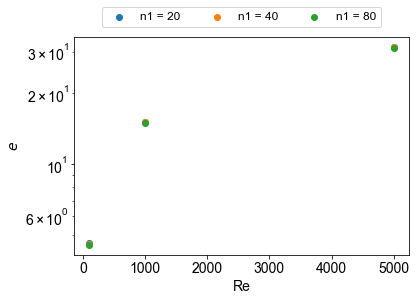

In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u_UP1, datos_v_UP1, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('c_error_UP1_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

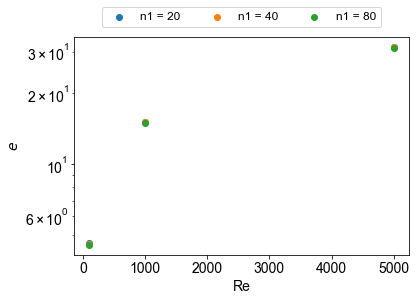

In [ ]:
#Calculo los errores
errores = errores_advectivo(datos_u_QUICK, datos_v_QUICK, guia_ucentral, guia_vcentral)

#Grafico los errores vs nro de Re, una curva por cada n1
Re_array = np.array([100,1000,5000])
n1_array = np.array([20,40,80])
for i in range(3):
    plt.scatter(Re_array, errores[i,:], label='n1 = ' + str(n1_array[i]))

#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('Re')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
# plt.xscale("log")
plt.yscale("log")

#Guardo el gráfico
plt.savefig('c_error_QUICK_Re_vs_n1.pdf', format='pdf',bbox_inches = "tight")

### Inciso d
Calculo el orden de convergencia espacial de UP1 en el cálculo de las velocidades en 2 puntos distintos.

In [11]:
#Cargo datos

datos_erroru_1 = genfromtxt("datos/d_error_uparticular_Re1.csv",delimiter = ',')
datos_erroru_1000 = genfromtxt("datos/d_error_uparticular_Re1000.csv",delimiter = ',')
datos_errorv_1 = genfromtxt("datos/d_error_vparticular_Re1.csv",delimiter = ',')
datos_errorv_1000 = genfromtxt("datos/d_error_vparticular_Re1000.csv",delimiter = ',')

# datos_u_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
# datos_v_solucion = genfromtxt('datos/d_solucion.csv', delimiter=',')
# datos_u_UP1 = genfromtxt('datos/d_u_UP1.csv', delimiter=',')
# datos_v_UP1 = genfromtxt('datos/d_v_UP1.csv', delimiter=',')

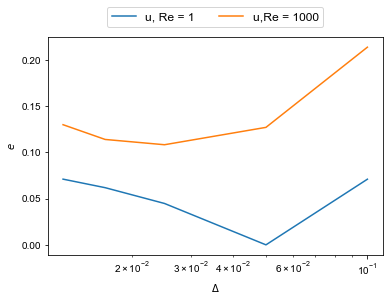

In [12]:
#Calculo los errores
# errores = errores_advectivo(datos_u_UP1, datos_v_UP1, datos_u_solucion, datos_v_solucion)

#Grafico los errores vs n1, una curva para cada Re
Re_array = np.array([1,1000])
n1_array = np.array([10,20,40,60,80])
Delta_array = np.zeros(len(n1_array))
for i in range(len(n1_array)):
    Delta_array[i] = 1/n1_array[i]

plt.plot(Delta_array, datos_erroru_1, label='u, Re = 1')
plt.plot(Delta_array, datos_erroru_1000, label='u,Re = 1000')


#Parámetros del gráfico:
plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$\Delta$')
plt.ylabel('$e$')
# plt.xticks(x, my_xticks)
# plt.yticks(np.arange(y.min(), y.max(), 0.005))
# plt.yticks(np.arange(-0.5,0.5 + 0.2,0.2))
# plt.xlim(10.0**-4, 10.0**0)
plt.xscale("log")
# plt.yscale("log")

#Guardo el gráfico
plt.savefig('d_error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")

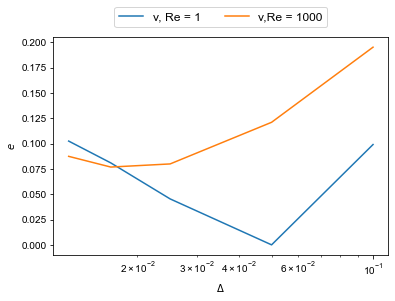

In [13]:
plt.plot(Delta_array, datos_errorv_1, label='v, Re = 1')
plt.plot(Delta_array, datos_errorv_1000, label='v,Re = 1000')

plt.legend(loc='lower center', ncol = 4, bbox_to_anchor=(0, 1.02, 1, 0.2),fontsize = 12)
plt.xlabel('$\Delta$')
plt.ylabel('$e$')

plt.xscale("log")

plt.savefig('d_error_UP1_n1_vs_Re.pdf', format='pdf',bbox_inches = "tight")

### Inciso e

No va a haber gráfico. Voy a tener que ejecutar el código e ir copiando los resultados directamente en el .tex

### Inciso f

Ídem al anterior

### Inciso g

Grafico la evolución temporal de u(0.5,0.5) y v(0.5,0.5) para distintos lsimpler y distintos métodos de evolución temporal

In [ ]:
#Importo datos

datos_1E =  genfromtxt("datos/evolucion_g_nsimpler1_metodotemporalE.csv", delimiter=',')
datos_1C =  genfromtxt("datos/evolucion_g_nsimpler1_metodotemporalC.csv", delimiter=',')
datos_3E =  genfromtxt("datos/evolucion_g_nsimpler3_metodotemporalE.csv", delimiter=',')
datos_3C =  genfromtxt("datos/evolucion_g_nsimpler3_metodotemporalC.csv", delimiter=',')


In [ ]:
#Grafico la evolución para distintos nsimpler y metodos de evolución temporal
#1 gráfico para u y otro para v


#tiempo: datos_1E[:,0]
# datos_1E[:,2]
# datos_1E[:,3]




